## IMAGE CLASSIFICATION

The train data consists of 20000 images, belonging to 10 different classes. The task is to train a convolutional neural net in keras for this multi-class classification. The purpose here is to get familiar with image data format, working with images, building the training dataset, Convolutional Architectures, Keras API & hyper parameters and their tuning.

In [1]:
#Setting the working directory

import os 

location = os.chdir("C:/Users/Mounika/Documents/monica work/INSOFE/CUTE04/20180203_Batch_33_CSE_7321c_CUTe")


In [2]:
#Loading train and test data

import numpy as np

train = np.load("train.npz")      #The .npz file format is a zipped archive of files named after the variables they contain. 
print('train keys',train.keys())  #np.load returns a dictionary-like object which can be queried for its list of arrays.
train_data = train['data']
train_labels = train['labels']

test = np.load("test_with_labels.npz")
print(test.keys())
test_data = test['data']
test_labels = test['labels']

train keys ['labels', 'data']
['row_id', 'labels', 'data']


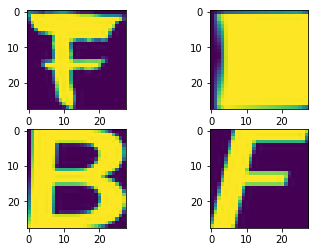

In [3]:
#Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(2,2,1)
plt.imshow(train_data[1])

plt.subplot(2,2,2)
plt.imshow(train_data[5])

plt.subplot(2,2,3)
plt.imshow(test_data[10])

plt.subplot(2,2,4)
plt.imshow(test_data[15])

## Preprocessing the data


In [8]:
#Checking for missing values

import pandas as pd

pd.isna(train_data).sum()

0

In [10]:
#Converting the labels to categorical
from keras.utils import to_categorical

nb_classes = len(np.unique(train_labels)) #Calculating the number of labels

target_train = to_categorical(train_labels,nb_classes)
target_test = to_categorical(test_labels,nb_classes)

C:\Users\Mounika\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
#Preparing the data

train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [13]:
#Checking the shape of data

print(train_data.shape)
print(train_labels.shape)

(20000, 28, 28)
(20000,)


In [14]:
img_rows,img_cols=28,28
img_channels = 1

In [15]:
#Reshaping the input data

train_data = np.reshape(train_data,(train_data.shape[0],img_rows,img_cols,img_channels))
test_data = np.reshape(test_data,(test_data.shape[0],img_rows,img_cols,img_channels))

## Model Building

In [16]:
#Building the neural network architecture

from keras.models import Sequential
from keras.layers import Dropout,Flatten,Dense
from keras.layers import Convolution2D,MaxPooling2D


model = Sequential()

model.add(Convolution2D(filters=32,kernel_size=(3,3),padding='same',
                       input_shape=(img_rows,img_cols,1),activation='relu'))
model.add(Convolution2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Convolution2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Convolution2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax'))

In [17]:
#Configuring the model

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
#Fitting the model

model_train = model.fit(train_data,target_train,batch_size=32,
             epochs=25,validation_split=0.3,
             shuffle=True)

Train on 14000 samples, validate on 6000 samples
Epoch 1/25
14000/14000 [==============================] - 83s 6ms/step - loss: 0.9859 - acc: 0.6835 - val_loss: 0.5241 - val_acc: 0.8433
Epoch 2/25
14000/14000 [==============================] - 73s 5ms/step - loss: 0.5785 - acc: 0.8287 - val_loss: 0.4561 - val_acc: 0.8630
Epoch 3/25
14000/14000 [==============================] - 521s 37ms/step - loss: 0.5082 - acc: 0.8471 - val_loss: 0.4366 - val_acc: 0.8690
Epoch 4/25
14000/14000 [==============================] - 64s 5ms/step - loss: 0.4700 - acc: 0.8549 - val_loss: 0.3946 - val_acc: 0.8823
Epoch 5/25
14000/14000 [==============================] - 67s 5ms/step - loss: 0.4332 - acc: 0.8671 - val_loss: 0.3933 - val_acc: 0.8828
Epoch 6/25
14000/14000 [==============================] - 66s 5ms/step - loss: 0.4114 - acc: 0.8759 - val_loss: 0.3853 - val_acc: 0.8855
Epoch 7/25
14000/14000 [==============================] - 66s 5ms/step - loss: 0.3921 - acc: 0.8763 - val_loss: 0.3659 - val_ac

In [19]:
#Printing the summary of model

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 64)          0         
__________

In [20]:
#Saving the model
model.save('cute_model.h5py')

## Model Evaluation

In [21]:
#Model evaluation on the test set
test_eval = model.evaluate(test_data, target_test, verbose=1)

2000/2000 [==============================] - 4s 2ms/step


In [22]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.2819580278284848
Test accuracy: 0.9245


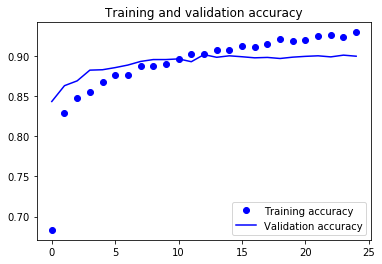

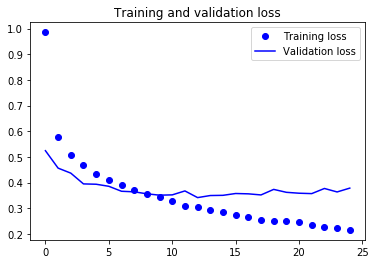

In [23]:
#Plotting accuracy and loss plots between training and validation sets.

accuracy = model_train.history['acc']
val_accuracy = model_train.history['val_acc']
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
from keras.models import load_model
model_final = load_model('cute_model.h5py')

In [25]:
#Predicting classes for test data
predictions= model_final.predict(test_data)
print(predictions)

[[7.8593744e-03 3.5160724e-02 1.3606827e-01 ... 3.8468618e-02
  6.6492510e-01 1.6470384e-03]
 [9.9999976e-01 3.9474761e-09 8.5554025e-10 ... 5.3411591e-09
  1.1308652e-09 5.1909255e-10]
 [2.3272948e-08 2.8369143e-06 1.3051946e-09 ... 1.6433823e-08
  1.5363640e-06 1.1462466e-08]
 ...
 [1.5268329e-08 1.7142103e-08 9.9993610e-01 ... 3.5504721e-07
  2.1294066e-07 4.9778395e-09]
 [8.2553271e-07 9.9995947e-01 3.5011087e-08 ... 1.4834731e-07
  1.9209207e-08 1.1861714e-10]
 [3.5094474e-06 3.2266218e-02 8.8321539e-03 ... 3.8314358e-04
  1.3636496e-03 1.1245953e-05]]


In [26]:
predicted_classes = np.round(predictions,1)

In [27]:
#Importing predictions to a file

import pandas as pd
I = pd.Index(range(2000),name="row_id")
C = pd.Index(("0","1","2","3","4","5","6","7","8","9"), name="col_id")
df = pd.DataFrame(data=predicted_classes,
                  index=I,
                  columns=C)
df.reset_index()
df.to_csv("Submissions.csv", index=False)